In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import catboost

#### Get our data

In [2]:
import os.path
cur_path = "./GiveMeSomeCredit/"

In [3]:
df = pd.read_csv(os.path.join(cur_path, "cs-training.csv"), index_col=0)

In [4]:
df.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   
3                                2                        1   
4                                5                        0   
5                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
1                             6                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   
5                             1                                     0   

   NumberOfDependents  
1                 2.0  
2                 1.0  
3                 0.0  
4                 0.0  
5                 0.0

In [5]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120269 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtypes: fl

#### All features are numerical

#### Let's look at the definition of our features

In [9]:
describe_features = pd.read_excel(os.path.join(cur_path, "Data Dictionary.xls"), skiprows=1)

In [10]:
describe_features

Variable Name  \
0                       SeriousDlqin2yrs   
1   RevolvingUtilizationOfUnsecuredLines   
2                                    age   
3   NumberOfTime30-59DaysPastDueNotWorse   
4                              DebtRatio   
5                          MonthlyIncome   
6        NumberOfOpenCreditLinesAndLoans   
7                NumberOfTimes90DaysLate   
8           NumberRealEstateLoansOrLines   
9   NumberOfTime60-89DaysPastDueNotWorse   
10                    NumberOfDependents   

                                          Description        Type  
0   Person experienced 90 days past due delinquenc...         Y/N  
1   Total balance on credit cards and personal lin...  percentage  
2                            Age of borrower in years     integer  
3   Number of times borrower has been 30-59 days p...     integer  
4   Monthly debt payments, alimony,living costs di...  percentage  
5                                      Monthly income        real  
6   Number of Open loans (installment like car loa...     integer  
7   Number of times borrower has been 90 days or m...     integer  
8   Number of mortgage and real estate loans inclu...     integer  
9   Number of times borrower has been 60-89 days p...     integer  
10  Number of dependents in family excluding thems...     integer

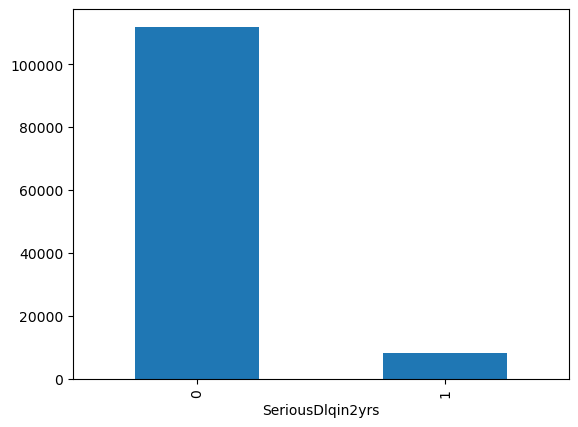

In [11]:
df["SeriousDlqin2yrs"].value_counts().plot(kind='bar');

In [12]:
import math

In [16]:
tot_col = 5
tot_rows = math.ceil(df.columns.size / tot_col)

fig = make_subplots(rows=tot_rows, cols=tot_col, specs=[[{'type': 'bar'}] * tot_col] * tot_rows, 
                    subplot_titles=df.keys())


for row in range(tot_rows):
    for col in range(tot_col):
        if row * tot_col + col >= df.columns.size:
            break
        fig.add_trace(
            go.Bar(y=df.iloc[:, row * tot_col + col].value_counts().values,
                    x=df.iloc[:, row * tot_col + col].value_counts().index,),
            row = row + 1, col=col + 1)


fig.update_layout(height=800, width=1500, title_text="Data")
fig.show()

<Axes: >

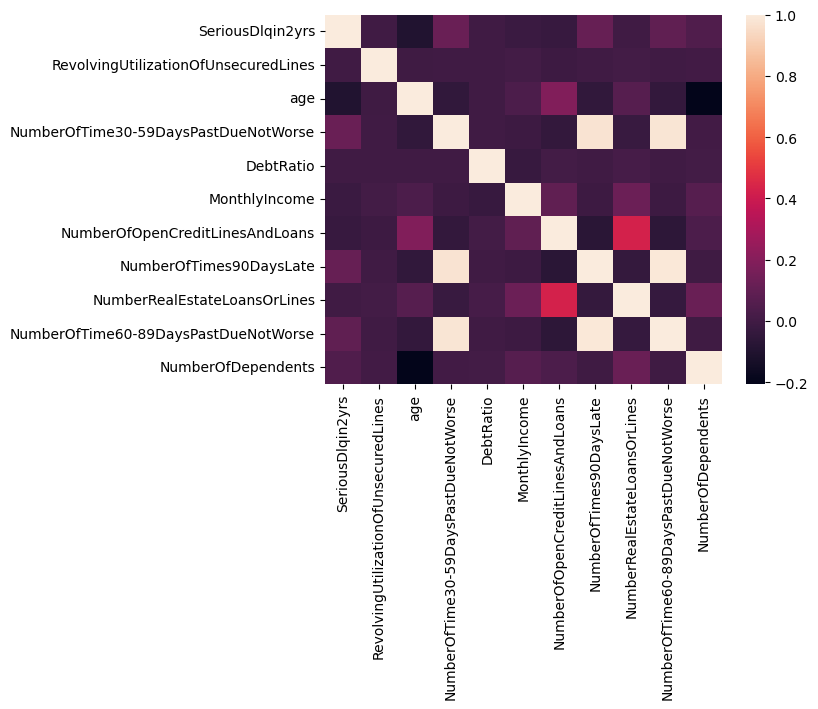

In [17]:
sns.heatmap(df.corr())

#### The averages and standard deviations of the table are as follows

In [26]:
for i in df.columns[1:]:
    print(f"{i}\t mean: {df[i].mean()}\t std: {df[i].std()}")

RevolvingUtilizationOfUnsecuredLines	 mean: 5.899872509725507	 std: 257.040684796841
age	 mean: 51.289792049489066	 std: 14.42668368323666
NumberOfTime30-59DaysPastDueNotWorse	 mean: 0.38176920070841197	 std: 3.4992338498214943
DebtRatio	 mean: 26.598777445397225	 std: 424.4464573597521
MonthlyIncome	 mean: 6670.221237392844	 std: 14384.674215282244
NumberOfOpenCreditLinesAndLoans	 mean: 8.758474752429969	 std: 5.172835272181423
NumberOfTimes90DaysLate	 mean: 0.21192493493751507	 std: 3.465275694790239
NumberRealEstateLoansOrLines	 mean: 1.0545194522279224	 std: 1.1492734431660425
NumberOfTime60-89DaysPastDueNotWorse	 mean: 0.18782895010351794	 std: 3.4479014794287437
NumberOfDependents	 mean: 0.8518321429462289	 std: 1.148390939236169


#### As we can see the number of different overdue days is highly correlated with each other

#### Also in our data there is a strong class imbalance, our target class is much lower, while we care about accuracy in our model as a priority metric, so we will judge the model by it

In [12]:
from sklearn.model_selection import cross_val_score

In [30]:
X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

In [31]:
X.shape, y.shape

((120269, 10), (120269,))

#### Normalize

In [32]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [42]:
X.mean(axis=0), X.std(axis=0)

(array([-3.30844966e-18, -2.45416069e-16, -3.54476749e-19,  1.89054266e-18,
         1.31156397e-17,  1.59514537e-16, -2.12686050e-18, -1.37064343e-17,
         1.41790700e-17, -3.88742835e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [96]:
model = LogisticRegression()
res = cross_val_score(model, X, y, cv=5, scoring='precision', n_jobs=5)
print(f"Mean: {res.mean()}\t std: {res.std()}")

model.fit(X, y)
precision_score(y, model.predict(X))

Mean: 0.5781338524000785	 std: 0.04914295265828711


0.5789473684210527

#### Now let's try random forest classifier

In [171]:
model = RandomForestClassifier()
res = cross_val_score(model, X, y, cv=5, scoring='precision', n_jobs=5)
print(f"Mean: {res.mean()}\t std: {res.std()}")

model.fit(X, y)
precision_score(y, model.predict(X))

Mean: 0.5510607550533224	 std: 0.015708006629142526


0.9998802825332216

#### Now let's try catboos

In [109]:
def print_cv_summary(cv_data):

    best_value = cv_data['test-Precision-mean'].min()
    best_iter = cv_data['test-Precision-mean'].values.argmin()

    print('Best validation Precision score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-Precision-std'][best_iter],
        best_iter)
    )

In [110]:
params = {
    'loss_function': 'Logloss',
    'custom_loss': 'Precision',
}

In [111]:
cat = catboost.CatBoostClassifier(verbose=False)
pool = catboost.Pool(data=X, label=y)
res = catboost.cv(params=params, pool=pool,  fold_count=5, verbose=False)
print_cv_summary(res)

Training on fold [0/5]

bestTest = 0.1848586186
bestIteration = 543

Training on fold [1/5]

bestTest = 0.1887213943
bestIteration = 529

Training on fold [2/5]

bestTest = 0.1870620379
bestIteration = 589

Training on fold [3/5]

bestTest = 0.1849235498
bestIteration = 480

Training on fold [4/5]

bestTest = 0.1836443174
bestIteration = 574

Best validation Precision score : 0.5835±0.0122 on step 996


In [112]:
cat.fit(X, y)
preds = cat.predict(X)

precision_score(y, preds)

0.8822483102098897

In [117]:
test_df = pd.read_csv(os.path.join(cur_path, 'cs-test.csv'), index_col=0)
test_df.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   
3                               12                        0   
4                                7                        0   
5                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
1                             0                                     0   
2                             4                                     0   
3                             1                                     0   
4                             2                                     0   
5                             0                                     0   

   NumberOfDependents  
1                 0.0  
2                 2.0  
3                 2.0  
4                 0.0  
5                 1.0

In [121]:
X_test = test_df.iloc[:, 1:].to_numpy()
X_test.shape

(101503, 10)

In [122]:
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

In [172]:
preds = model.predict_proba(X_test)[:, 1]

In [173]:
preds = pd.DataFrame({'Probability': preds})

In [174]:
preds = preds.reset_index()

In [175]:
preds["index"] += 1

In [176]:
preds = preds.rename(columns={'index': 'Id'})

In [ ]:
preds.to_csv("Catboost.csv", index=False)

#### As we can see catboost performed best in the credit scoring task, showing an accuracy value on the whole dataset equal to 0.882

#### After scoring on test set on Kaggle we got 0.78602 on private score on random forest and 0.81412 on catboost

#### This is because although random forest is a reasonably good model for classification, architecturally each tree within it is learned independently of the others and the prediction result is averaged, while catboost learns the next tree based on the error of the previous one, which reduces the model error more strongly